In [1]:
import numpy as np

In [2]:
# creating a dataset
X = 10 * np.random.randn(500, 1)
y = 1/(1+ np.exp(-X))
noise = 0.15*np.random.randn(500, 1)
yg = y + noise

# splitting the dataset into training and validation data
Xtrain = np.asarray(X[0:400])
Xval = np.asarray(X[400:500])
Ytrain = np.asarray(y[0:400])
Ygtrain = np.asarray(yg[0:400])
yval = np.asarray(y[400:500])
ygval  = np.asarray(yg[400:500])


In [3]:
from sklearn.linear_model import LinearRegression 

#creating two linear regession models
cleanmodel = LinearRegression()
noisemodel = LinearRegression()
cleanmodel.fit(Xtrain,Ytrain)
noisemodel.fit(Xtrain, Ygtrain)

ypred = cleanmodel.predict(Xval)
ygpred = noisemodel.predict(Xval)

In [4]:
#visualization fn
import matplotlib.pyplot as plt

def visual(X,y,X_new,y_new):
    order = np.argsort(X_new)
    plt.plot(X, y, "b.")
    plt.plot(X_new[order], y_new[order], "r-", label="Predictions",lw=1)
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([-10, 10, 0, 3])
    plt.show()

clean dataset RMSE :  0.0545738713964972


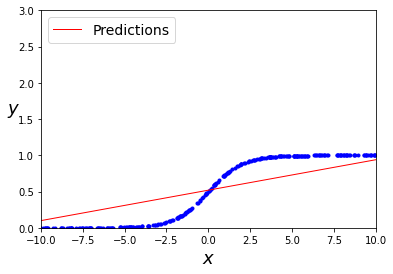

noisy dataset RMSE :  0.07674838915710538


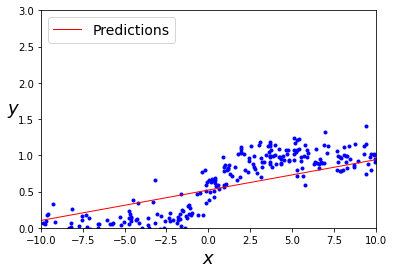

In [5]:
from sklearn.metrics import mean_squared_error
ymean = (mean_squared_error(yval, ypred))
ygmean = (mean_squared_error(ygval, ygpred))
yrmse = np.sqrt(ymean)
ygrmse = np.sqrt(ygmean)

#printing mean squared error of the base models
print('clean dataset RMSE : ',  ymean)
visual(Xtrain,Ytrain,Xval.flatten(),ypred.flatten())
print('noisy dataset RMSE : ', ygmean)
visual(Xtrain,Ygtrain,Xval.flatten(),ygpred.flatten())

In [6]:
from sklearn.preprocessing import PolynomialFeatures

#polynomial X features of order 2,3,4,5
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features2.fit_transform(X)
X_poly2[0]

poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly_features3.fit_transform(X)
X_poly3[0]

poly_features4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly_features4.fit_transform(X)
X_poly4[0]

poly_features5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly_features5.fit_transform(X)
X_poly5[0]

array([-5.87418109e+00,  3.45060035e+01, -2.02694513e+02,  1.19066428e+03,
       -6.99417758e+03])

In [7]:
#splitting the training and validation dataset  
Xtrain2 = np.asarray(X_poly2[0:400])
Xval2 = np.asarray(X_poly2[400:500])

Xtrain3 = np.asarray(X_poly3[0:400])
Xval3 = np.asarray(X_poly3[400:500])

Xtrain4 = np.asarray(X_poly4[0:400])
Xval4 = np.asarray(X_poly4[400:500])

Xtrain5 = np.asarray(X_poly5[0:400])
Xval5 = np.asarray(X_poly5[400:500])

#creating 8 models of polynomial regestion with clean and noisy Y dataset
lin_reg2 = LinearRegression()
lin_reg2.fit(Xtrain2, Ytrain)
lin_reg2.intercept_, lin_reg2.coef_

lin_reg3 = LinearRegression()
lin_reg3.fit(Xtrain3, Ytrain)
lin_reg3.intercept_, lin_reg3.coef_

lin_reg4 = LinearRegression()
lin_reg4.fit(Xtrain4, Ytrain)

lin_reg4.intercept_, lin_reg4.coef_
lin_reg5 = LinearRegression()
lin_reg5.fit(Xtrain5, Ytrain)
lin_reg5.intercept_, lin_reg5.coef_

#noisy data set models 
lin_reg2g = LinearRegression()
lin_reg2g.fit(Xtrain2, Ygtrain)
lin_reg2.intercept_, lin_reg2g.coef_

lin_reg3g = LinearRegression()
lin_reg3g.fit(Xtrain3, Ygtrain)
lin_reg3g.intercept_, lin_reg3g.coef_

lin_reg4g = LinearRegression()
lin_reg4g.fit(Xtrain4, Ygtrain)
lin_reg4g.intercept_, lin_reg4g.coef_

lin_reg5g = LinearRegression()
lin_reg5g.fit(Xtrain5, Ygtrain)
lin_reg5g.intercept_, lin_reg5.coef_


(array([0.53347145]),
 array([[ 8.75089832e-02, -6.85913147e-04, -3.10609431e-04,
          2.01751065e-06,  3.44199394e-07]]))

Degree 2 : Clean RMSE:  0.0535773362434484  Noisy RMSE:  0.07501864038259204


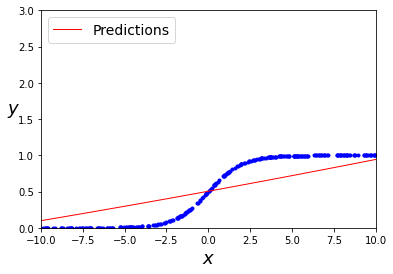

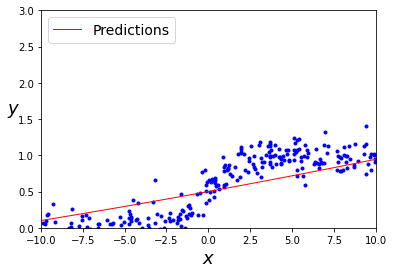

Degree 3 : Clean RMSE:  0.027062838049825302  Noisy RMSE:  0.038744635507402966


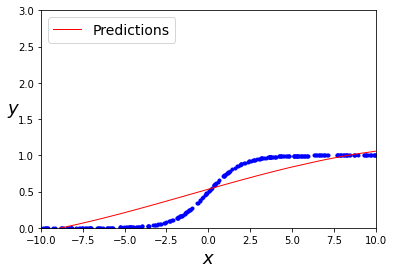

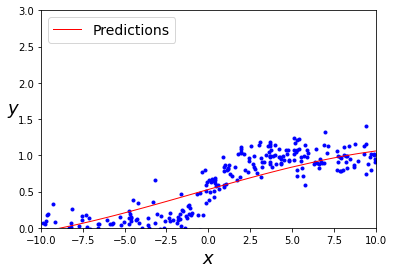

Degree 4 : Clean RMSE 0.028082854124291585  Noisy RMSE:  0.037929083455938116


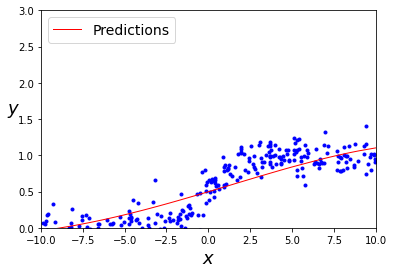

Degree 5 : Clean RMSE:  0.01704804256903776  Noisy RMSE:  0.030925073520327553


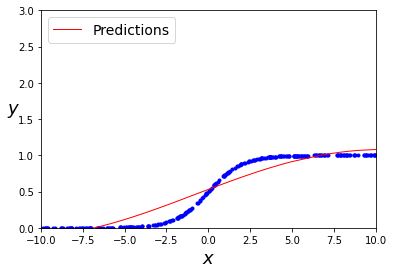

In [8]:
#predicted datasets 
pred2 = lin_reg2.predict(Xval2)
pred3 = lin_reg3.predict(Xval3)
pred4 = lin_reg4.predict(Xval4)
pred5 = lin_reg5.predict(Xval5)

pred2g = lin_reg2g.predict(Xval2)
pred3g = lin_reg3g.predict(Xval3)
pred4g = lin_reg4g.predict(Xval4)
pred5g = lin_reg5g.predict(Xval5)


#RMSE and visualization of the models created
sqrt2 = (mean_squared_error(yval, pred2))
sqrt2noise = (mean_squared_error(ygval, pred2g))
print('Degree 2 : Clean RMSE: ',sqrt2, ' Noisy RMSE: ', sqrt2noise)
visual(Xtrain, Ytrain, Xval.flatten(), pred2.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), pred2g.flatten())

sqrt3 = (mean_squared_error(yval, pred3))
sqrt3noise = (mean_squared_error(ygval, pred3g))
print('Degree 3 : Clean RMSE: ',sqrt3, ' Noisy RMSE: ', sqrt3noise)
visual(Xtrain, Ytrain, Xval.flatten(), pred3.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), pred3g.flatten())

sqrt4 = (mean_squared_error(yval, pred4))
sqrt4noise = (mean_squared_error(ygval, pred4g))
print('Degree 4 : Clean RMSE',sqrt4,' Noisy RMSE: ',  sqrt4noise)
visual(Xtrain, Ytrain, Xval.flatten(), pred4.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), pred4g.flatten())

sqrt5 = (mean_squared_error(yval, pred5))
sqrt5noise = (mean_squared_error(ygval, pred5g))
print('Degree 5 : Clean RMSE: ',sqrt5,' Noisy RMSE: ',  sqrt5noise)
visual(Xtrain, Ytrain, Xval.flatten(), pred5.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), pred5g.flatten())

In [9]:
#2,3,4,5 polynomia fn with regularization

from sklearn.linear_model import Lasso
lasso_reg2 = Lasso(alpha=0.3)
lasso_reg2.fit(Xval2, yval)

lasso_reg3 = Lasso(alpha=0.3)
lasso_reg3.fit(Xval3, yval)

lasso_reg5 = Lasso(alpha=0.3)
lasso_reg5.fit(Xval5, yval)

lasso_reg4 = Lasso(alpha=0.3)
lasso_reg4.fit(Xval4, yval)

lasso_reg2g = Lasso(alpha=0.3)
lasso_reg2g.fit(Xval2, ygval)

lasso_reg3g = Lasso(alpha=0.3)
lasso_reg3g.fit(Xval3, ygval)

lasso_reg5g = Lasso(alpha=0.3)
lasso_reg5g.fit(Xval5, ygval)

lasso_reg4g = Lasso(alpha=0.3)
lasso_reg4g.fit(Xval4, ygval)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Degree 2 Lasso : Clean RMSE: 0.05263617864762787  Noisy RMSE:  0.07346187686701618


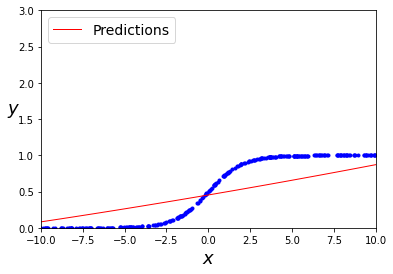

Degree 3 Lasso : Clean RMSE  0.02816295722144702  Noisy RMSE:  0.037543197184573794


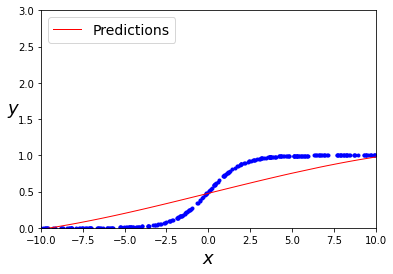

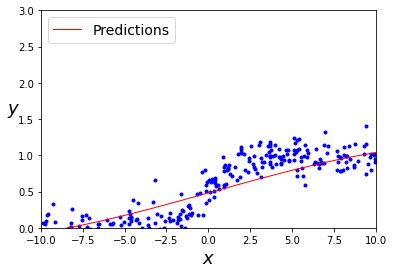

Degree 4 Lasso : Clean RMSE:  0.02795039189844458  Noisy RMSE:  0.03717775417022822


Degree 5 Lasso : Clean RMSE:  0.022038131804291747  Noisy RMSE:  0.03491417879315291


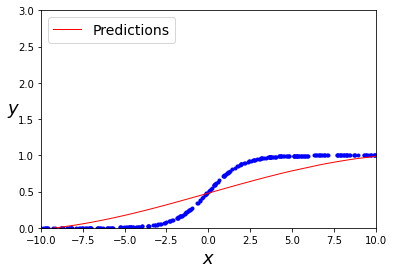

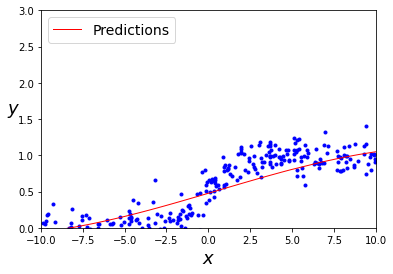

In [10]:

lpred2 = lasso_reg2.predict(Xval2)
lpred3 = lasso_reg3.predict(Xval3)
lpred4 = lasso_reg4.predict(Xval4)
lpred5 = lasso_reg5.predict(Xval5)

lpred2g = lasso_reg2g.predict(Xval2)
lpred3g = lasso_reg3g.predict(Xval3)
lpred4g = lasso_reg4g.predict(Xval4)
lpred5g = lasso_reg5g.predict(Xval5)


#RMSE of the mmodels created

lsqrt2 = (mean_squared_error(yval, lpred2))
lsqrt2noise = (mean_squared_error(ygval, lpred2g))
print('Degree 2 Lasso : Clean RMSE:',lsqrt2, ' Noisy RMSE: ', lsqrt2noise)
visual(Xtrain, Ytrain, Xval.flatten(), lpred2.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), lpred2g.flatten())

lsqrt3 = (mean_squared_error(yval, lpred3))
lsqrt3noise = (mean_squared_error(ygval, lpred3g))
print('Degree 3 Lasso : Clean RMSE ',lsqrt3,' Noisy RMSE: ',  lsqrt3noise)
visual(Xtrain, Ytrain, Xval.flatten(), lpred3.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), lpred3g.flatten())

lsqrt4 = (mean_squared_error(yval, lpred4))
lsqrt4noise = (mean_squared_error(ygval, lpred4g))
print('Degree 4 Lasso : Clean RMSE: ',lsqrt4, ' Noisy RMSE: ', lsqrt4noise)
visual(Xtrain, Ytrain, Xval.flatten(), lpred4.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), lpred4g.flatten())

lsqrt5 = (mean_squared_error(yval, lpred5))
lsqrt5noise = (mean_squared_error(ygval, lpred5g))
print('Degree 5 Lasso : Clean RMSE: ',lsqrt5,' Noisy RMSE: ',  lsqrt5noise)
visual(Xtrain, Ytrain, Xval.flatten(), lpred5.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), lpred5g.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.182972533920931, tolerance: 0.010491963343710501
  positive)


Lasso for clean data


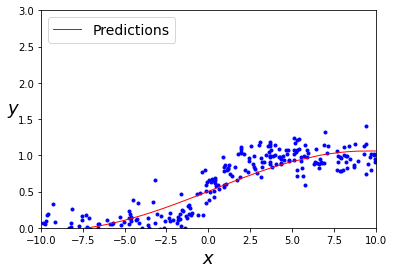

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso for noisy data


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.295928525063324, tolerance: 0.011724944354517847
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7356549355945523, tolerance: 0.0004622480980578355
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3688628673179037, tolerance: 0.0008648565441082213
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.19524163322258, tolerance: 0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9693476972835291, tolerance: 0.0004896681116100968
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0224734037277106, tolerance: 0.0010214301063969998
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.859694348730567, tolerance: 

In [11]:
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


#function for plotting learning curve 
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train),20):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

#creating a polynomial model of order 20 
poly_features20 = PolynomialFeatures(degree=20, include_bias=False)
X_poly20 = poly_features20.fit_transform(X)

#getting training and validation data 
Xtrain20 = np.asarray(X_poly20[0:400])
Xval20 = np.asarray(X_poly20[400:500])



#doing the lasso regression 

#lasso for clean data 
lasso_reg20 = Lasso(alpha=0.1)
lasso20 = lasso_reg20.fit(X_poly20, y)
la20 = lasso20.predict(Xval20)
print("Lasso for clean data")
visual(Xtrain, Ygtrain, Xval.flatten(), la20.flatten())
print(lasso20)

#lasso for noisy data 
lasso_reg20g = Lasso(alpha=0.1)
lasso20g = lasso_reg20g.fit(X_poly20, yg)
la20g = lasso20g.predict(Xval20)
print("Lasso for noisy data")
visual(Xtrain, Ygtrain, Xval.flatten(), la20g.flatten())
print(lasso20g)

# lasso_reg201 = Lasso(alpha=0.1)
# lasso201 = lasso_reg201.fit(Xtrain20, Ytrain)


polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("L",  Lasso())
    ])

#plotting a learning curve 
plot_learning_curves(polynomial_regression, X, y)
plt.title("Clean Data")
plt.axis([0, 20, 0, 0.8])         
plt.show()


#plotting a learning curve 
plot_learning_curves(polynomial_regression, X, yg)
plt.title("Noisy Data")
plt.axis([0, 20, 0, 0.8])         
plt.show()


In [12]:
from sklearn.svm import SVR

#creating two SVR models

svm_regression = SVR(kernel="poly", degree=3, C=100, epsilon=0.2)
svm_regression.fit(Xtrain3,Ytrain)
svm_regression_noise = SVR(kernel="poly", degree=3, C=100, epsilon=0.2)
svm_regression_noise.fit(Xtrain3,Ygtrain)

#predicting the values
predSVR = svm_regression.predict(Xval3)
predSVRNoise = svm_regression_noise.predict(Xval3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.tree import DecisionTreeRegressor

#creating two DTRegressors

DecisionTree = DecisionTreeRegressor(max_depth=9)
DecisionTree.fit(Xtrain2,Ytrain)

DecisionTreeNoise = DecisionTreeRegressor(max_depth=9)
DecisionTreeNoise.fit(Xtrain2,Ygtrain)

#predicting the values
predDT = DecisionTree.predict(Xval2)
predDTNoise = DecisionTreeNoise.predict(Xval2)

SVR : Clean RMSE:  0.21388519083194651  Noisy RMSE:  0.24540445217571233


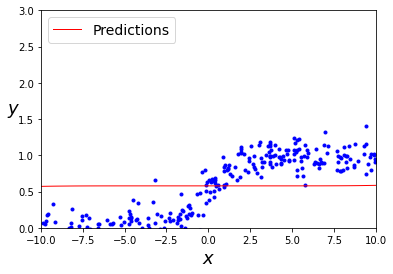

Dt : Clean RMSE:  8.294603040982092e-06  Noisy RMSE:  0.038564435340058094


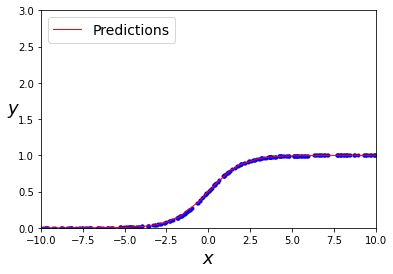

In [14]:
#getting RMSE and visuals
sqrtSVR = (mean_squared_error(yval, predSVR))
sqrtSVRNoise = (mean_squared_error(ygval, predSVRNoise))
print('SVR : Clean RMSE: ',sqrtSVR,' Noisy RMSE: ',  sqrtSVRNoise)
visual(Xtrain, Ytrain, Xval.flatten(), predSVR.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), predSVRNoise.flatten())

sqrtDT = (mean_squared_error(yval, predDT))
sqrtDTNoise = (mean_squared_error(ygval, predDTNoise))
print('Dt : Clean RMSE: ',sqrtDT,' Noisy RMSE: ',  sqrtDTNoise)
visual(Xtrain, Ytrain, Xval.flatten(), predDT.flatten())
visual(Xtrain, Ygtrain, Xval.flatten(), predDTNoise.flatten())

#SVR and decision tree regressions do worse than the baseline models